In [1]:
# Importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('.../CC GENERAL.csv')

In [3]:
# Explore the data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renaming the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing values in descending order
    # .iloc[:, 1]!= 0: will filter on missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)
    
    # Print summary information
    print("Your slelected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the table with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

Your slelected dataframe has 18 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MINIMUM_PAYMENTS,313,3.50
CREDIT_LIMIT,1,0.01


In [8]:
# Fill in missing values with the median
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [9]:
# Checking again for missing values
missing_values_table(df)

Your slelected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
# Summary statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


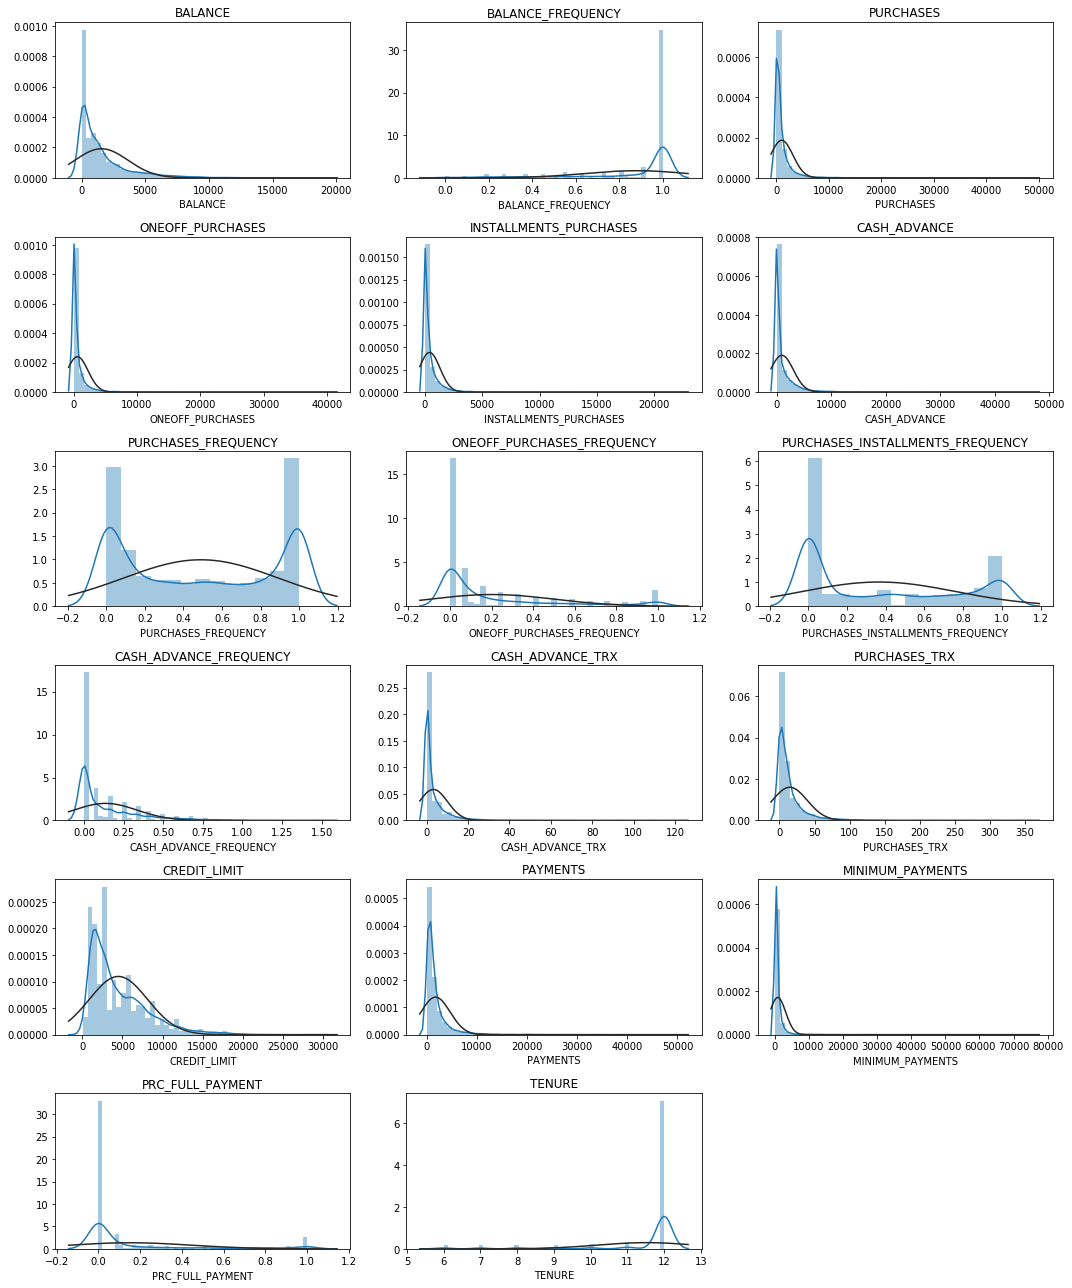

In [11]:
# Distribution plot of the features

from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

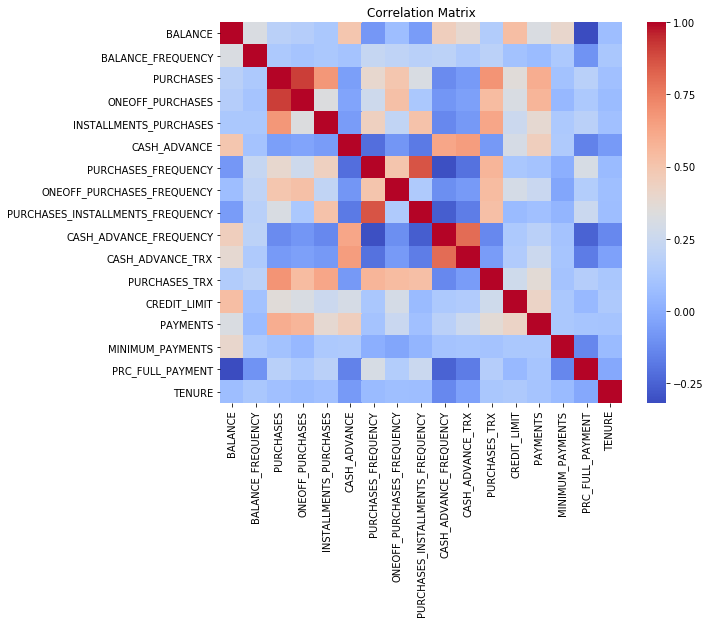

In [12]:
# Correlation matrix between the features
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

We see from the above matrix that Balance has a high correlation with Cash Advance
and Credit Limit. Balance determines how much cash you give
and it also determines the credit limit you get when you apply
for a new card. It can also be deduced that Payment has a high correlation
with Purchases

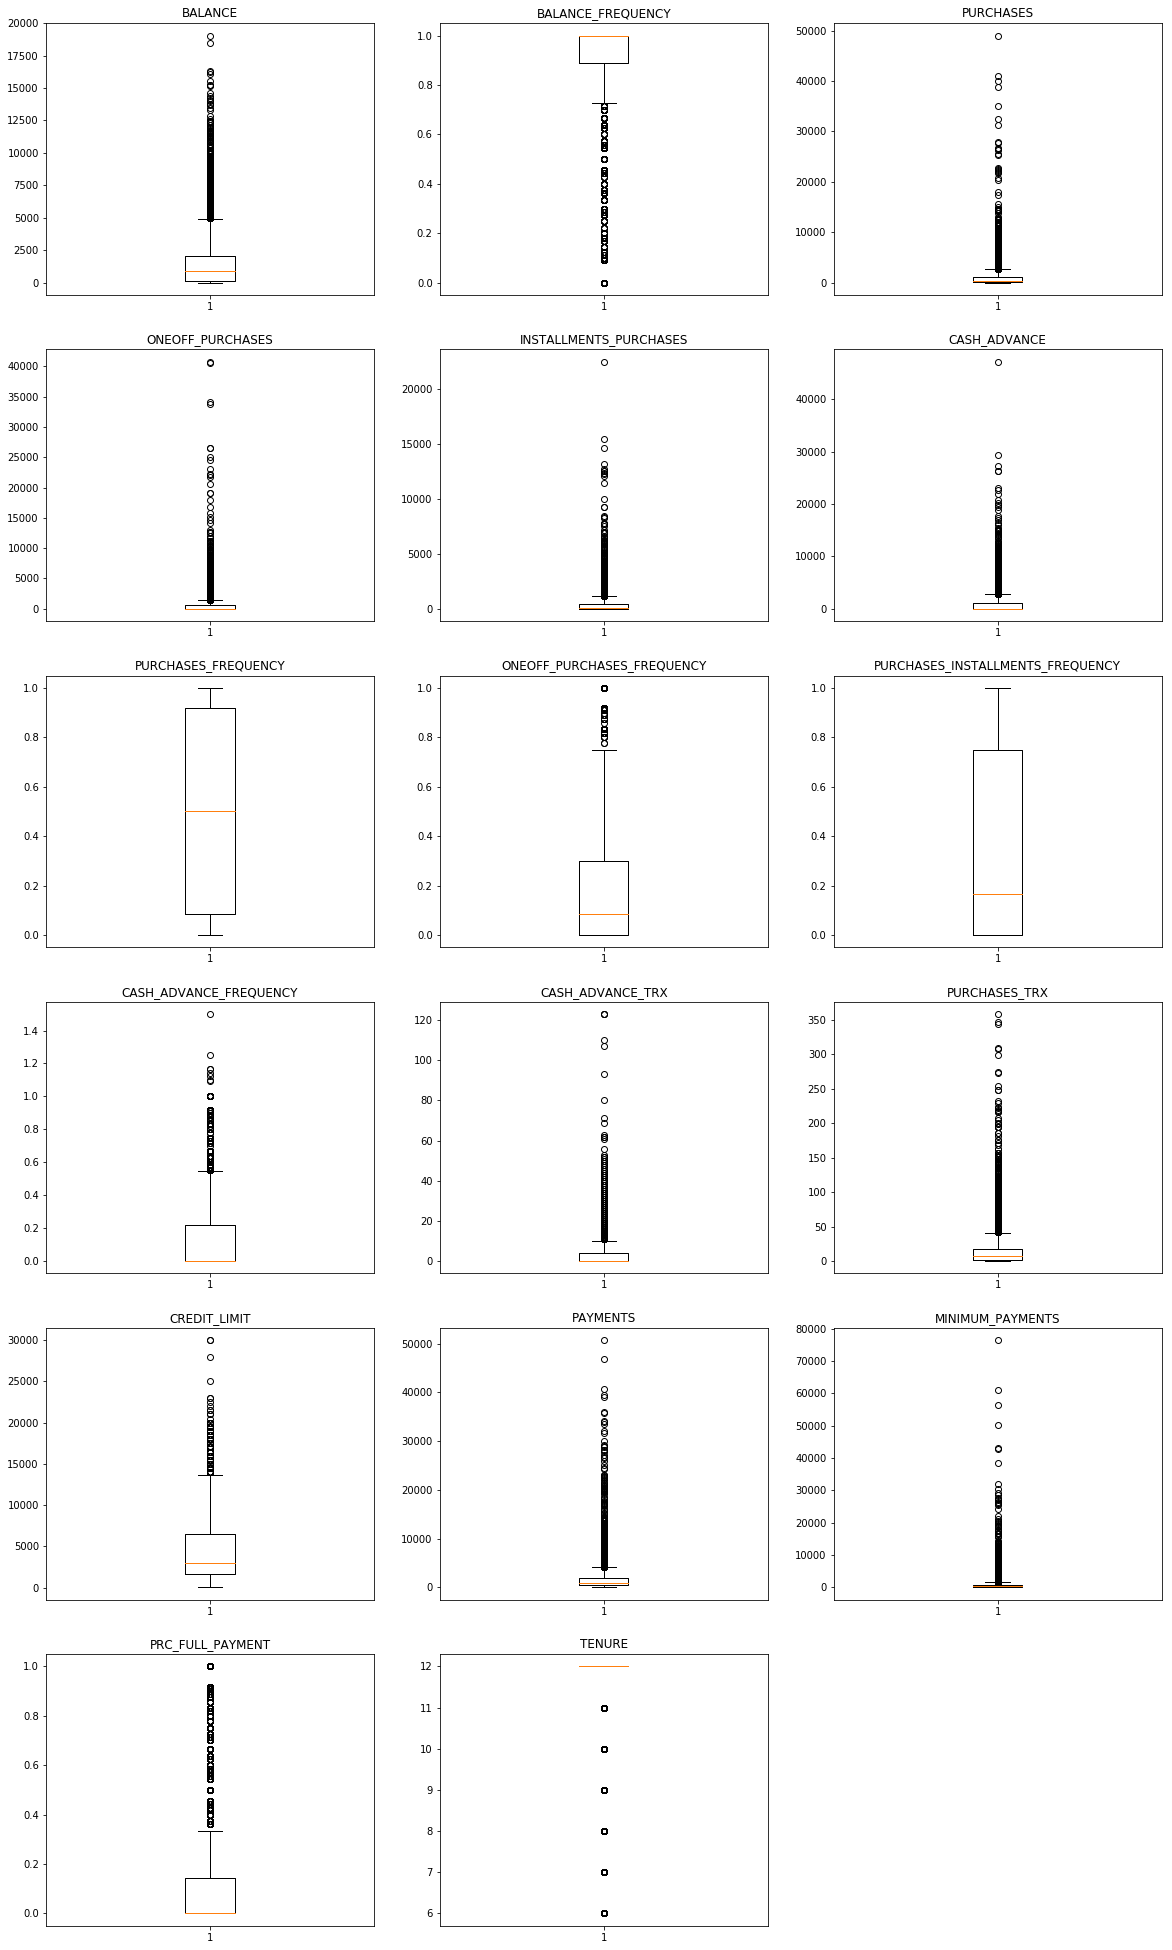

In [13]:
# A graph showing outliers
plt.figure(figsize=(20,35))

for i in range(0, 17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

Its obvious there are some outliers
for the purpose of illustration will go
ahead with Kmeans clustering

In [14]:
# Feature Scaling
sc_X = StandardScaler()

X = df[graph_by_variables]
df_std = sc_X.fit_transform(X)

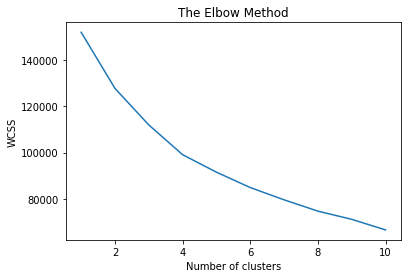

In [15]:
# Modeling

# Kmeans Clustering

# Determining the number of Clusters
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

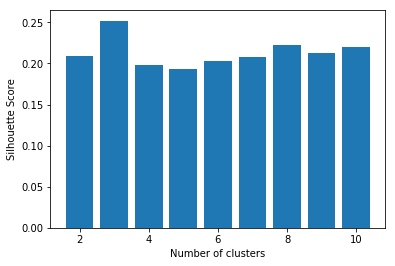

In [16]:
# Determining the number of clusters with
# Silhouette method(silhouette_score requires more than 1 cluster labels)
silhouette_scores = [] 

for i in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = i).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [17]:
kmeans_values=[]

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(i,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((i,sil_score))
# deciding between clusters 3, 7, 8, 9, 10

Silhouette score for 2 cluster k-means: 0.210
Silhouette score for 3 cluster k-means: 0.251
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.203
Silhouette score for 7 cluster k-means: 0.215
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.218
Silhouette score for 10 cluster k-means: 0.221


In [18]:
# Fitting K-Means to the dataset
# I chose 8 clusters
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_std)
labels=kmeans.labels_

In [19]:
df['cluster'] = kmeans.labels_

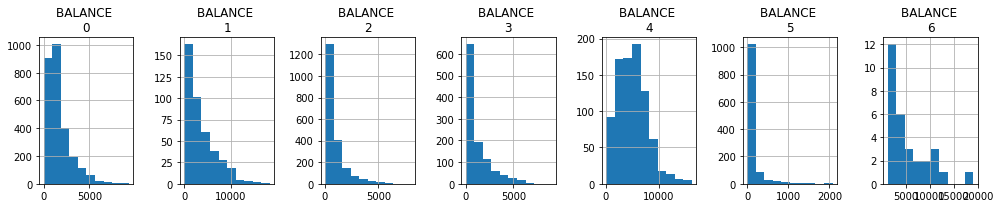

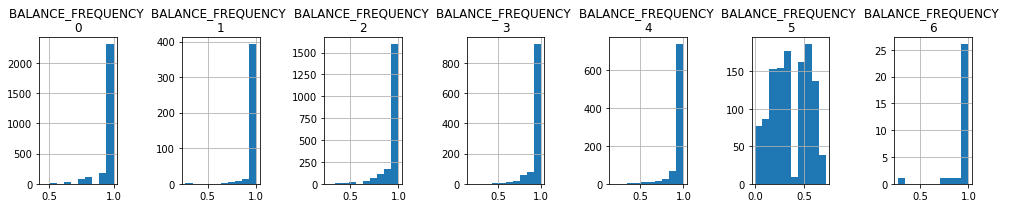

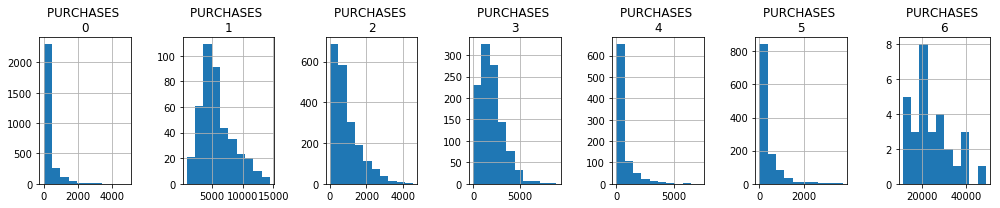

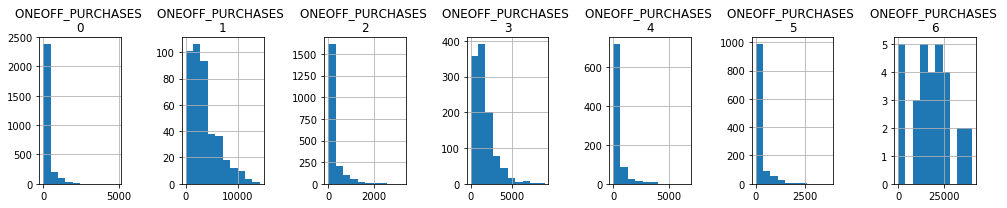

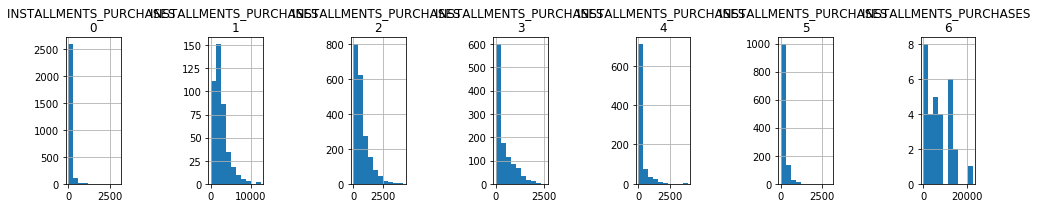

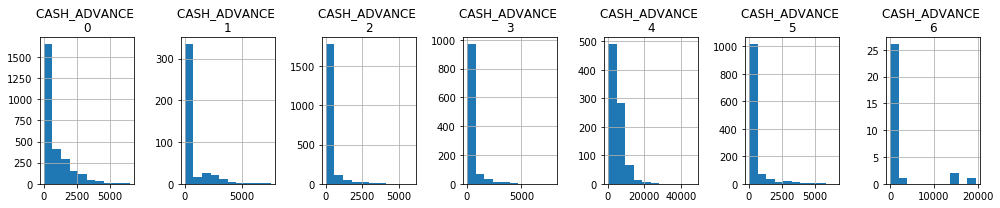

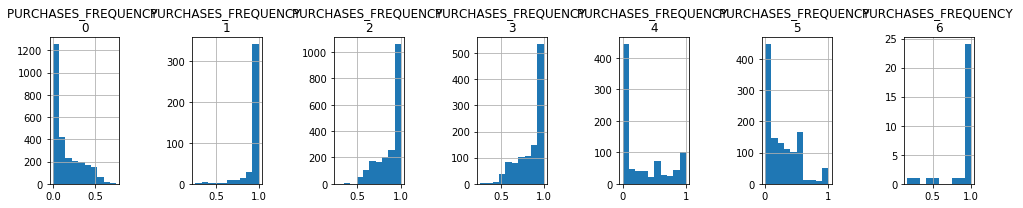

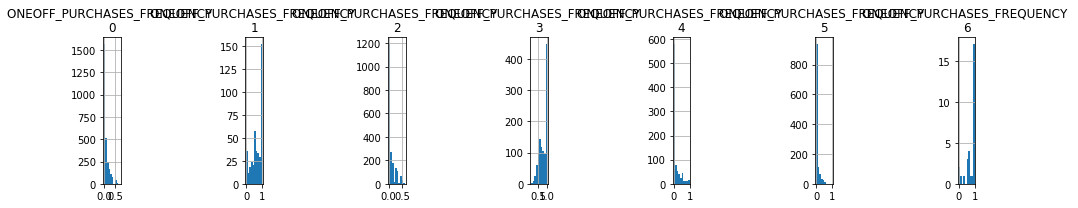

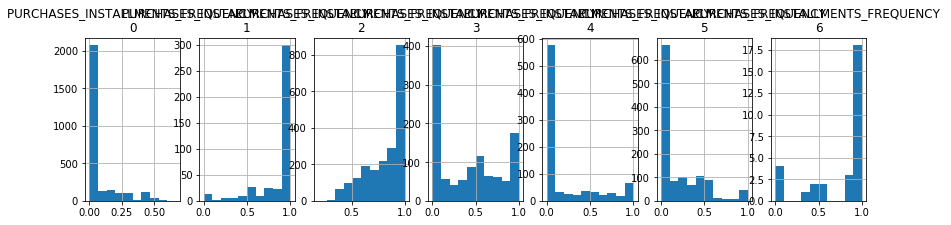

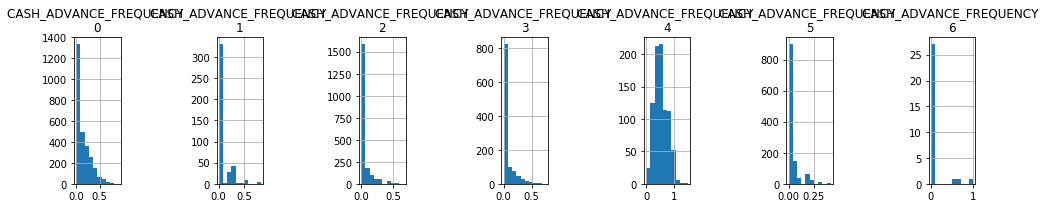

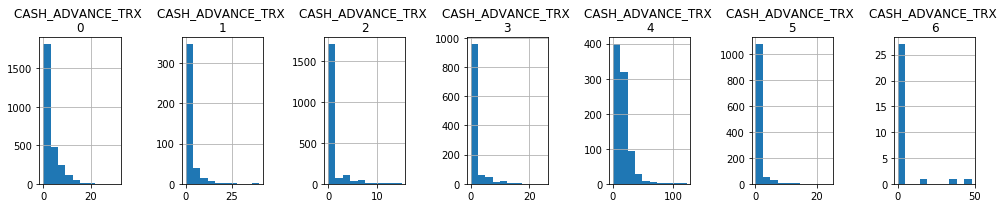

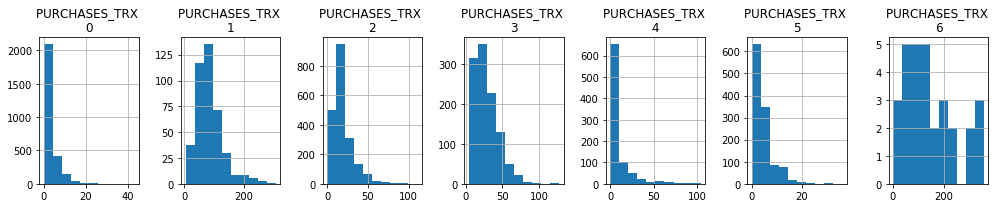

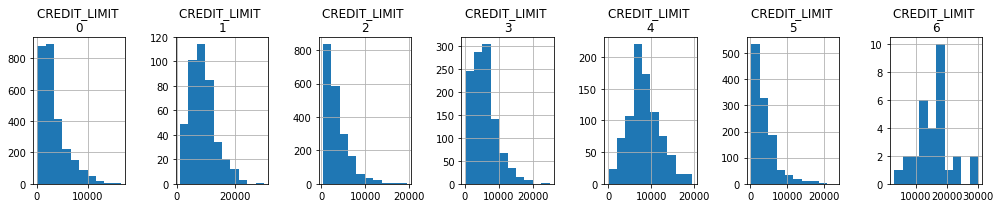

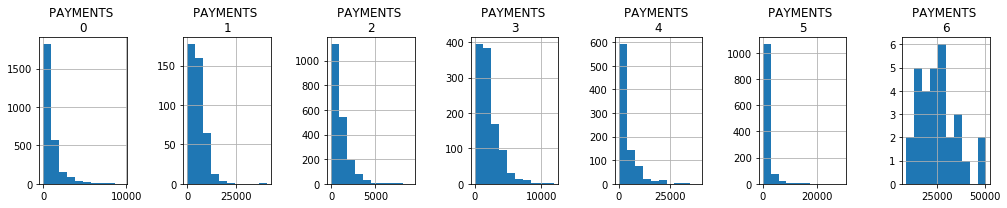

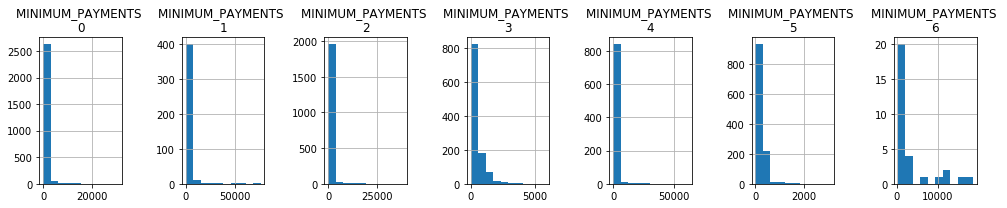

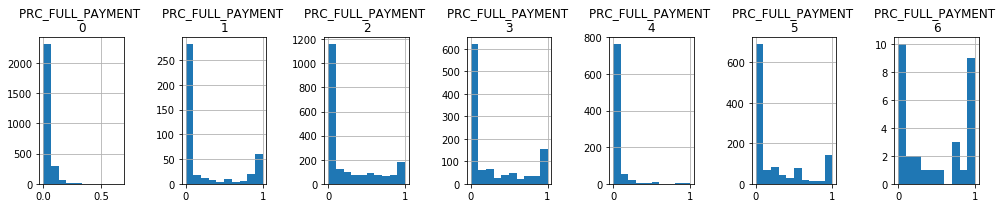

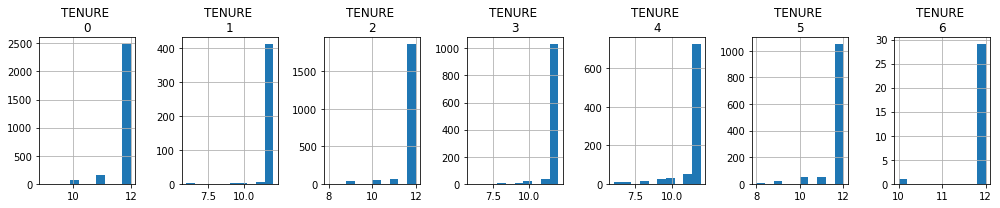

In [21]:
# Interpretation of the Clusters
random_state = 42
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(14,3))
    for i in range(0,7):
        plt.subplot(1,7,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

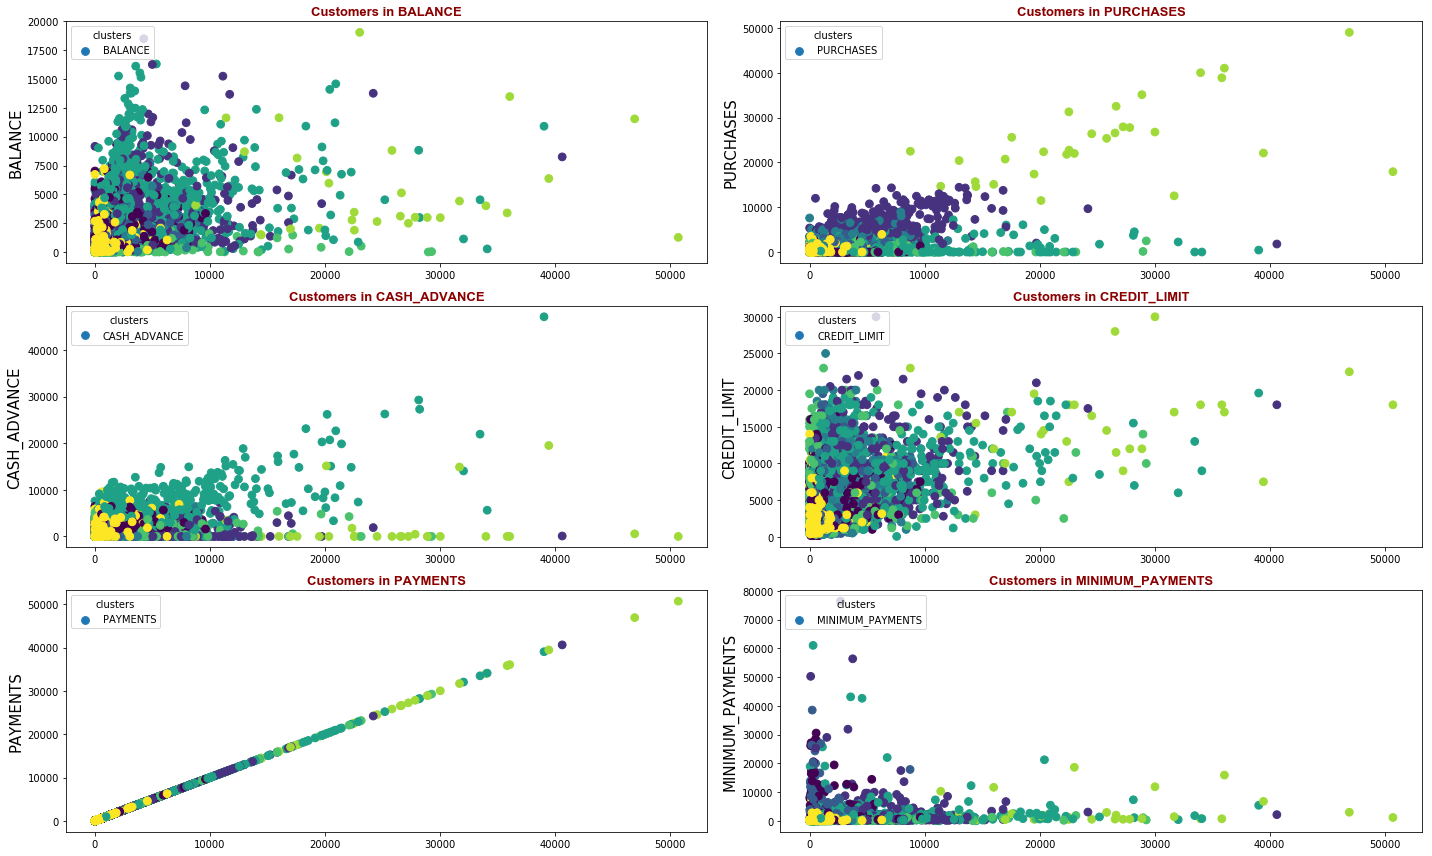

In [22]:
# Relationship between Customer Payments and some features
random_state = 42
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]
fig, axes = plt.subplots(3,2,figsize=(20,12))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(df['PAYMENTS'], df[best_columns[i]], c= df['cluster'], s=60)
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    #plt.xlabel('customer_behaviours',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()

# From the above plot
1. A small group of customers have a large high amount cash advance. Few have 
low amount of cash advance
2. Very small group have high credit limits because of they make high purchases. 
Those with low credit limits make less purcahses
3. Low payments are done by a small group of customers with low purchases.

# Conclusion

Cluster 0: This customer group indicates a small group of customers who are small spenders with the lowest minimum payment.

Cluster 1: This group is using their credit cards for a large number of purchases.

Cluster 2: This group points out new customers with a lower credit limit and average balance level with small number of purchases.

Cluster 3: This cluster targets a group of customers who have a high credit limit and payments.

Cluster 4: A small group of customers with the highest credit limit, the highest minimum payments, and high cash advance. We can assume that these customers tend to increase credit limits to follow up on their spending habits.

Cluster 5: This segment has the lowest INSTALLMENTS_PURCHASES percentage and balance.

Cluster 6: This group is similar to cluster 4 customer group but with higher balance.